# Heat Exchangers Basic
## Counterflow concentric tube heat exchanger
A counterflow, concentric tube heat exchanger is used to cool the lubricating oil for a large
industrial gas turbine engine. The flow rate of cooling water through the inner tube ($D_i$ = 25
mm) is 0.2 kg/s, while the flow rate of oil through the outer annulus ($D_o$ = 45 mm) is 0.1 kg/s.
The oil and water enter at temperatures of 100 and 30<sup>o</sup>C, respectively. How long must
the tube be made if the outlet temperature of the oil is to be 60<sup>o</sup>C? The convection
coeffients on the water side and the oil side are 2250 and 38.8 W/m2K respectively.

### Known

In [1]:
import logging
from typing import Union
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

diameter_inner_tube = 0.025 # m
diameter_outer_tube = 0.045 # m
flow_rate_cooling_water = 0.2 # kg/s
flow_rate_oil = 0.1 # kg/s
temp_in_oil = 100 # degC
temp_in_water = 30 # degC
temp_out_oil = 60 # degC

### Find
Tube length to achieve the outlet temperature 60<sup>o</sup>C of oil

In [2]:
length_tube = None

### Schematic
![schematic](images/heat_exchanger_basic.png)

### Assumptions
1. Negligible loss to the surroundings.
2. Negligible kinetic and potential energy changes
3. Constant properties
4. Negligible tube wall thermal resistance and fouling factor
5. Fully developed conditions for the water and oil

### Properties

In [3]:
cp_oil = 2131 # J/kgK
cp_water = 4178 # J/kgK
h_oil = 38.8 # W/m2K
h_water = 2250 # W/m2K

### Analysis
From the given temperature conditions, we can calculate the heat transfer required using the
energy balance equation. In addition, we can calculate the temperature of water at the outlet.

$$q = \dot{m}_\mathrm{oil} c_{p, \mathrm{oil}} \left(T_{\mathrm{oil, in} - \left(T_{\mathrm{oil, out}\right) $$

In [4]:
q = flow_rate_oil * cp_oil * (temp_in_oil - temp_out_oil)
temp_out_water = temp_in_water + q / (flow_rate_cooling_water * cp_water)

Now we can find the required area of heat exchange using the Newton's cooling law for the given
heat transfer, $q$.

$$A = \frac{q}{U \Delta T_\mathrm{lm}}$$

In [5]:
heat_transfer_coefficient = 1 / ( 1 / h_oil + 1 / h_water )
delta_temp1 = temp_in_oil - temp_out_water
delta_temp2 = temp_out_oil - temp_in_water
lmtd = (delta_temp2 - delta_temp1) / np.log(delta_temp2 / delta_temp1)
area_required = q / (heat_transfer_coefficient * lmtd)
length_required = area_required / (np.pi * diameter_inner_tube)

print(f"Overall heat transfer coefficient is {heat_transfer_coefficient} W/m2")
print(f"Logarthmic mean of temperature difference is {lmtd} degC")
print(f"Area required for the inner tube is {area_required} m2")
print(f"Length required for the heat exchanger is {length_required} m")

Overall heat transfer coefficient is 38.14225795176511 W/m2
Logarthmic mean of temperature difference is 43.19998550172644 degC
Area required for the inner tube is 5.173130580911836 m2
Length required for the heat exchanger is 65.86634425695735 m


## Counterflow compact plate heat exchanger
The counterflow, concentric tube heat exchanger is replaced with a compact, plate-type heat
exchanger that consists of a stack of thin metal sheets, separated by $N$ gaps of width $a$. The oil
and water flows are subdivided into $N/2$ individual flow streams, with the oil and water moving in
opposite directions within alternating gaps. It is desirable for the stack to be of a cubical
geometry, with a characteristic exterior dimension L. Determine the exterior dimensions of the
heat exchanger as a function of the number of gaps if the flow rates, inlet temperatures, and
desired oil outlet temperature are the same. The convection coefficient on the water side is
$2.36N/L$ W/mK and $0.520N/L$

### Known
Constrain of the dimension of the heat exchanger
Other flow / temperature conditions are the same.

### Find

In [6]:
characteristic_length = None


### Schematic
![schematic](images/heat_exchager_basic2.png)

### Assumptions
1. Negligible heat loss to the surroundings.
2. Negligible kinetic and potential energy changes.
3. Constant properties.
4. Negligible plate thermal resistance and fouling factors.
5. Fully developed conditions for the water and oil.
6. Identical gap-to-gap heat transfer coefficients.
7. Heat exchanger exterior dimension is large compared to the gap width.

### Properties

In [7]:
rho_oil = 852.1 # kg/m3
rho_water = 994 # kg/m3

### Analysis

In [8]:
# Let's create a class to represent the phenomena

In [9]:
Numeric = Union[float, int, np.ndarray]

# Define logger
logger = logging.getLogger('HeatExchangeExample')
logger.setLevel(logging.INFO)

ch = logging.StreamHandler()
ch.setLevel(logging.INFO)

formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)

logger.addHandler(ch)

class CompactPlateTypeHeatExchangerBasic:
    """Class for compact plate type heat exchanger for its geometry, constrain and configuration"""
    def __init__(self, number_gaps: Numeric, characteristic_length: Numeric):
        """Constructor"""
        self.number_gaps = number_gaps
        self.characteristic_length = characteristic_length

    @property
    def gap_width(self):
        return self.characteristic_length / self.number_gaps

    @property
    def area_plate(self):
        return self.characteristic_length ** 2

    @property
    def total_heat_transfer_area(self):
        return self.area_plate * (self.number_gaps - 1)

    @property
    def h_water(self):
        return 2.36 * self.number_gaps / self.characteristic_length

    @property
    def h_oil(self):
        return 0.52 * self.number_gaps / self.characteristic_length

    @property
    def overall_convection_coefficient(self):
        return 1 / (1/self.h_oil + 1/self.h_water)

    def get_heat_transfer(self, log_mean_temperature_difference: Numeric):
        return self.overall_convection_coefficient * self.total_heat_transfer_area * \
               log_mean_temperature_difference

The heat transfer and the logarithmic mean temperature difference are the same as the previous
problem. Then, we can create a function for finding the characteristic length for the given
number of gaps.

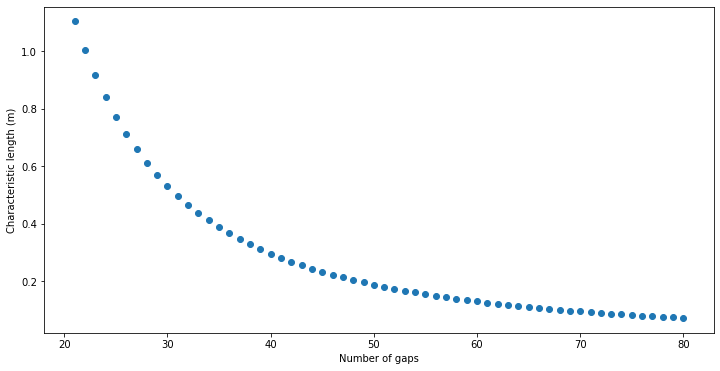

In [10]:
def get_characteristic_length(
        number_gaps: Numeric,
        heat_transfer_rate: Numeric,
        log_mean_temperature_difference: Numeric
) -> Union[Numeric, bool]:
    # For consistent handling of different types, we convert it to numpy ndarray.
    if type(number_gaps) is int:
        number_gaps = np.array([number_gaps])

    def function_to_solve(characteristic_length: Numeric):
        heat_exchanger = CompactPlateTypeHeatExchangerBasic(
            number_gaps=number_gaps,
            characteristic_length=characteristic_length
        )
        return heat_transfer_rate - heat_exchanger.get_heat_transfer(
            log_mean_temperature_difference)

    result = root(function_to_solve, x0=np.ones(number_gaps.shape))
    if result.success:
        if len(result.x) == 1:
            return result.x[0]
        else:
            return result.x
    else:
        logger.warn("Characteristic length to meet the given conditions not found.")
        return False

# Let's plot L as a function of N

number_gaps = np.linspace(21, 80, 60)
characteristic_length = get_characteristic_length(
    number_gaps=number_gaps,
    heat_transfer_rate=q,
    log_mean_temperature_difference=lmtd
)

if characteristic_length is not False:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(number_gaps, characteristic_length)
    ax.set_xlabel("Number of gaps")
    ax.set_ylabel("Characteristic length (m)")









